### **Pembelajaran Mesin H**
### **Rakha Fathin Izzan Consetta / 502522156**
### **Tugas K-Means Clustering #2**

### **Customer Personality Analysis**


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

#Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

#### **Read Data**

In [3]:
df = pd.read_csv('/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

#### **Data Assessment**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Penjelasan Atribut

**Identitas Pelanggan**
1. ID: Pengenal unik pelanggan.
2. Year_Birth: Tahun lahir pelanggan.
3. Education: Tingkat pendidikan pelanggan.
4. Marital_Status: Status pernikahan pelanggan.
5. Income: Pendapatan tahunan rumah tangga pelanggan.
6. Kidhome: Jumlah anak dalam rumah tangga pelanggan.
7. Teenhome: Jumlah remaja dalam rumah tangga pelanggan.
8. Dt_Customer: Tanggal pendaftaran pelanggan dengan perusahaan.
9. Recency: Jumlah hari sejak pembelian terakhir pelanggan.
10. Complain: 1 jika pelanggan mengeluh dalam 2 tahun terakhir, 0 jika tidak.

**Produk**

11. MntWines: Jumlah yang dihabiskan untuk anggur dalam 2 tahun terakhir.
12. MntFruits: Jumlah yang dihabiskan untuk buah-buahan dalam 2 tahun terakhir.
13. MntMeatProducts: Jumlah yang dihabiskan untuk produk daging dalam 2 tahun terakhir.
14. MntFishProducts: Jumlah yang dihabiskan untuk produk ikan dalam 2 tahun terakhir.
15. MntSweetProducts: Jumlah yang dihabiskan untuk permen dalam 2 tahun terakhir.
16. MntGoldProds: Jumlah yang dihabiskan untuk emas dalam 2 tahun terakhir.


**Promosi**

17. AcceptedCmp1: 1 jika pelanggan menerima penawaran dalam kampanye pertama, 0 jika tidak.
18. AcceptedCmp2: 1 jika pelanggan menerima penawaran dalam kampanye kedua, 0 jika tidak.
19. AcceptedCmp3: 1 jika pelanggan menerima penawaran dalam kampanye ketiga, 0 jika tidak.
20. AcceptedCmp4: 1 jika pelanggan menerima penawaran dalam kampanye keempat, 0 jika tidak.
21. AcceptedCmp5: 1 jika pelanggan menerima penawaran dalam kampanye kelima, 0 jika tidak.
22. Response: 1 jika pelanggan menerima penawaran dalam kampanye terakhir, 0 jika tidak.

**Tempat Transaksi**

23. NumDealsPurchases: Jumlah pembelian dengan diskon.
24. NumWebPurchases: Jumlah pembelian melalui situs web perusahaan.
25. NumCatalogPurchases: Jumlah pembelian menggunakan katalog.
26. NumStorePurchases: Jumlah pembelian langsung di toko.
27. NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir.

##### Tujuan Clustering
Sebelum data dianalisis dan diproses, akan ditentukan tujuan diterapkan clustering. Saya akan melakukan K-Means clustering pada dataset ini untuk membagi pelanggan menjadi beberapa klaster. Harapannya dapat terbagi pelanggan mana yang banyak mengungtungkan bisnis, dan pelanggan mana yang sedikit menguntungkan bisnis. Kita juga diharapkan mengehtahui karakteristik pelanggan pada setiap klaster agar bisnis dapat menarget pelanggan yang diinginkan berdasarkan karakterisitknya.

In [5]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [6]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**Permasalahan yang terdapat pada data:**
1. Terdapat 3 kolom yang berupa categorical. 'Education' merupakan ordinal data, 'Marital Status' merupakan nominal data, 'Dt_Customer' merupakan tanggal yang seharusnya bertipe date
2. 'Income' memiliki beberapa null value
3. Nama kolom banyak yang panjang dan beberapa kolom tidak akan digunakan

#### **Data Cleaning & Feature Engineering**

Mengisi null value pada "Income"

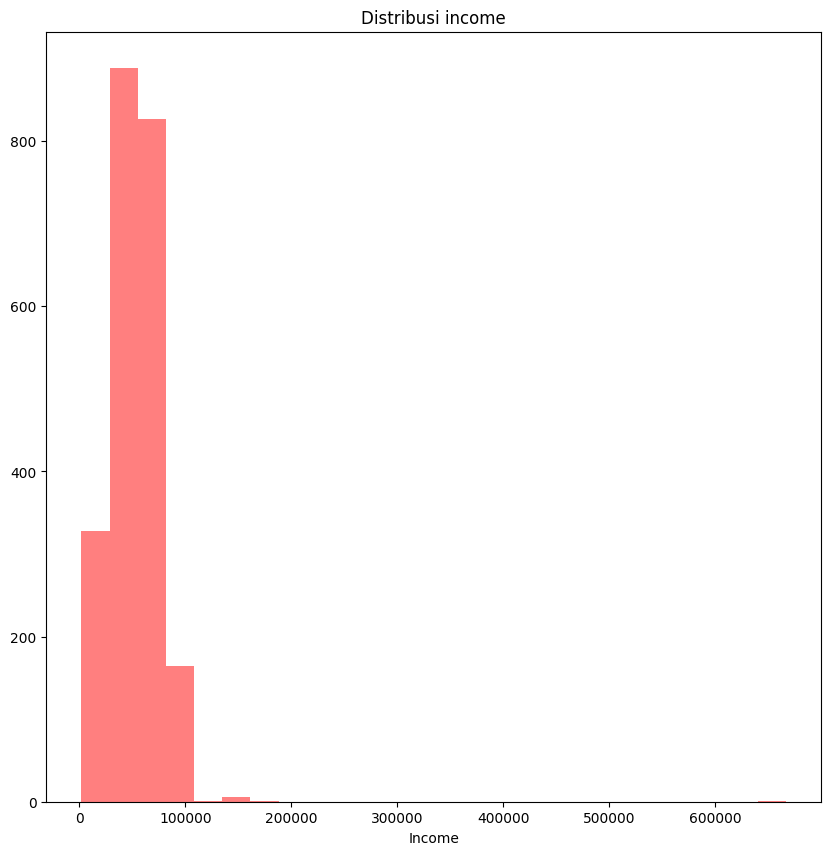

In [7]:
plt.figure(figsize=(10,10))

plt.hist(df['Income'].dropna(), bins=25, color='red', alpha=0.5)
plt.title('Distribusi income')
plt.xlabel('Income')

plt.show()

In [8]:
df['Income'].fillna(df['Income'].median(), inplace=True)
df.isna().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

Berikut adalah beberapa hal yang akan dilakukan untuk feature engineering:
1. Mengganti fitur "Year_Birth" dengan "Age".
2. Menggabungkan semua fitur yang menyatakan produk yang dibeli dalam beberapa kategori menjadi satu fitur "Total_Bought".
3. Menggabungkan semua fitur yang menyatakan jumlah dimana  pembelian terjadi dalam beberapa kategori menjadi satu fitur "Total_Purchases".
4. Membuat fitur baru "Family_Size" yang menggabungkan fitur yang menyatakan jumlah anak dan "Marital_Status".
5. Drop fitur yang tidak digunakan

In [9]:
df["Age"] = 2024-df["Year_Birth"]
df["Age"]

0       67
1       70
2       59
3       40
4       43
        ..
2235    57
2236    78
2237    43
2238    68
2239    70
Name: Age, Length: 2240, dtype: int64

In [10]:
print(df['Marital_Status'].value_counts())
print(df['Education'].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


In [11]:
df["Products_Bought"] = df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"] + df["MntFishProducts"] + df["MntSweetProducts"] + df["MntGoldProds"]
df["Products_Bought"]

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Products_Bought, Length: 2240, dtype: int64

In [12]:
df["Family_Size"] = df["Marital_Status"].replace({"Married":2, "Together":2, "Alone":1 ,"Absurd":1,
                                                  "Widow":1, "YOLO":1, "Divorced":1, "Single":1}).astype(int)\
                    + df["Kidhome"] + df["Teenhome"]
df["Family_Size"]


0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2240, dtype: int64

In [13]:
df["Total_Purchases"] = df["NumDealsPurchases"] + df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]
df["Total_Purchases"]

0       25
1        6
2       21
3        8
4       19
        ..
2235    18
2236    22
2237    19
2238    23
2239    11
Name: Total_Purchases, Length: 2240, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [15]:
dropped = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue",
           "Year_Birth", "ID", "MntMeatProducts", "MntWines", "MntFruits", "MntFishProducts", "MntSweetProducts",
           "MntGoldProds", "Kidhome", "Teenhome", "NumDealsPurchases", "NumWebPurchases",
           "NumCatalogPurchases", "NumStorePurchases", "AcceptedCmp1", "AcceptedCmp2"
           , "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Complain", "Response"]
df = df.drop(dropped, axis=1)

df = df.rename(columns={"NumWebVisitsMonth": "Monthly_Web_Visit"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2240 non-null   object 
 1   Income             2240 non-null   float64
 2   Recency            2240 non-null   int64  
 3   Monthly_Web_Visit  2240 non-null   int64  
 4   Age                2240 non-null   int64  
 5   Products_Bought    2240 non-null   int64  
 6   Family_Size        2240 non-null   int64  
 7   Total_Purchases    2240 non-null   int64  
dtypes: float64(1), int64(6), object(1)
memory usage: 140.1+ KB


In [16]:
df.describe()

Income      Recency  Monthly_Web_Visit          Age  \
count    2240.000000  2240.000000        2240.000000  2240.000000   
mean    52237.975446    49.109375           5.316518    55.194196   
std     25037.955891    28.962453           2.426645    11.984069   
min      1730.000000     0.000000           0.000000    28.000000   
25%     35538.750000    24.000000           3.000000    47.000000   
50%     51381.500000    49.000000           6.000000    54.000000   
75%     68289.750000    74.000000           7.000000    65.000000   
max    666666.000000    99.000000          20.000000   131.000000   

       Products_Bought  Family_Size  Total_Purchases  
count      2240.000000  2240.000000      2240.000000  
mean        605.798214     2.595089        14.862054  
std         602.249288     0.906959         7.677173  
min           5.000000     1.000000         0.000000  
25%          68.750000     2.000000         8.000000  
50%         396.000000     3.000000        15.000000  
75%        1045.500000     3.000000        21.000000  
max        2525.000000     5.000000        44.000000

Menghapus Outlier

Dapat dilihat bahwa pada "Age", max valuenya adalah 131, yang mana itu tidak mungkin, maka akan dilakukan penanganan outlier. Namun sebelum itu, kita visualisasi terlebih dahulu semua fitur agar kita dapat tau fitur apa saja yang terdapat outliernya


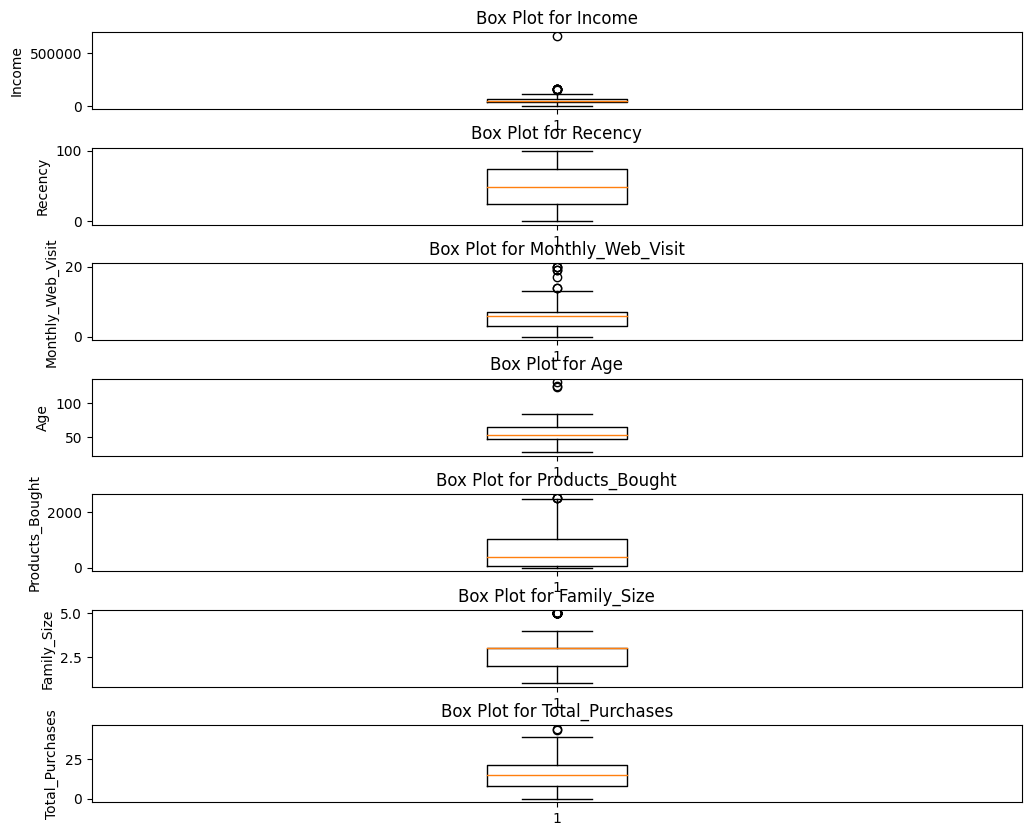

In [17]:
df_col = ['Income', 'Recency', 'Monthly_Web_Visit', 'Age', 'Products_Bought', 'Family_Size', 'Total_Purchases']
fig, axes = plt.subplots(nrows=len(df_col), ncols=1, figsize=(12, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(df_col):
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Box Plot for {col}')
    axes[i].set_ylabel(col)


plt.show()

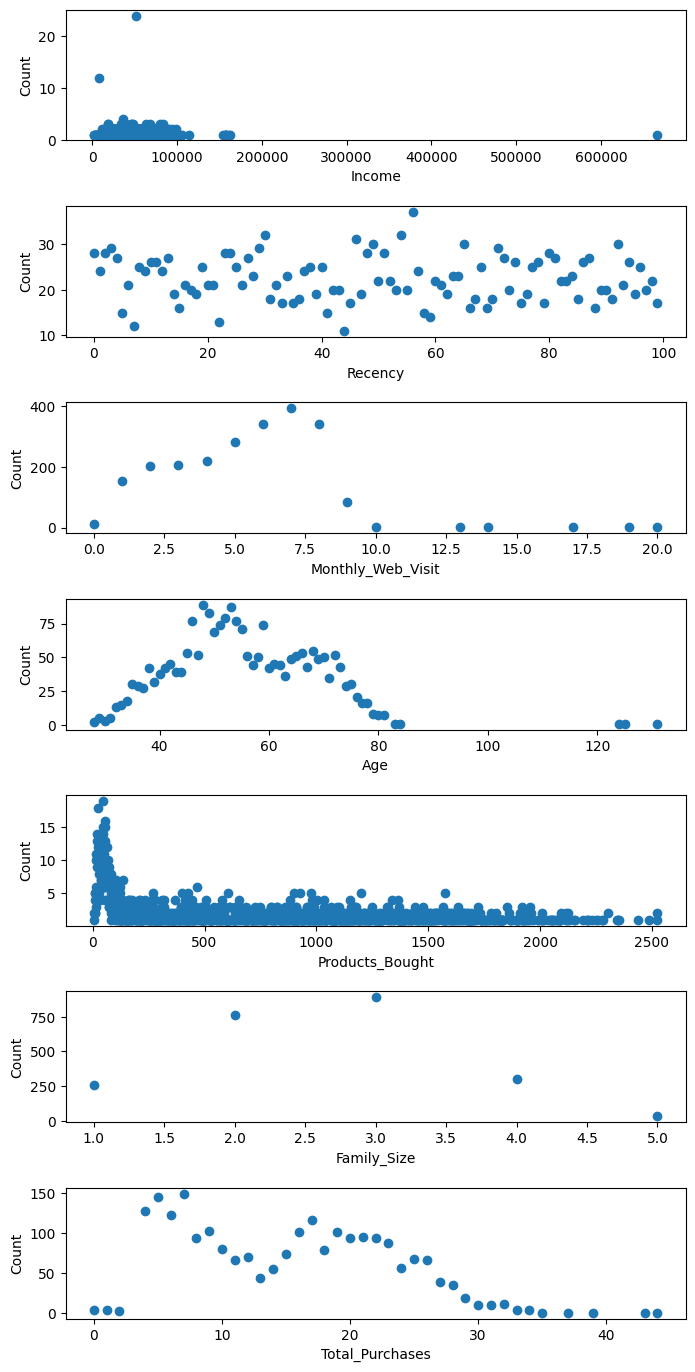

In [18]:
df_col = ['Income', 'Recency', 'Monthly_Web_Visit', 'Age', 'Products_Bought', 'Family_Size', 'Total_Purchases']
fig, axes = plt.subplots(nrows=len(df_col), ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(df_col):
    counts = df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    # axes[i].set_title(f'Scatter Plot for {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

In [19]:
from scipy import stats

z_scores = stats.zscore(df[df_col])
clean_df = df[(z_scores < 2.5).all(axis=1)]
clean_df.describe()

Income      Recency  Monthly_Web_Visit          Age  \
count    2157.000000  2157.000000        2157.000000  2157.000000   
mean    51476.978442    48.967548           5.308762    55.011127   
std     20246.484720    28.951592           2.281079    11.669294   
min      4428.000000     0.000000           0.000000    28.000000   
25%     35441.000000    24.000000           4.000000    46.000000   
50%     51381.500000    49.000000           6.000000    54.000000   
75%     67506.000000    74.000000           7.000000    65.000000   
max    113734.000000    99.000000          10.000000    84.000000   

       Products_Bought  Family_Size  Total_Purchases  
count      2157.000000  2157.000000      2157.000000  
mean        589.404265     2.571627        14.823829  
std         574.978863     0.863124         7.553306  
min           9.000000     1.000000         1.000000  
25%          69.000000     2.000000         8.000000  
50%         395.000000     3.000000        15.000000  
75%        1027.000000     3.000000        21.000000  
max        2092.000000     4.000000        34.000000

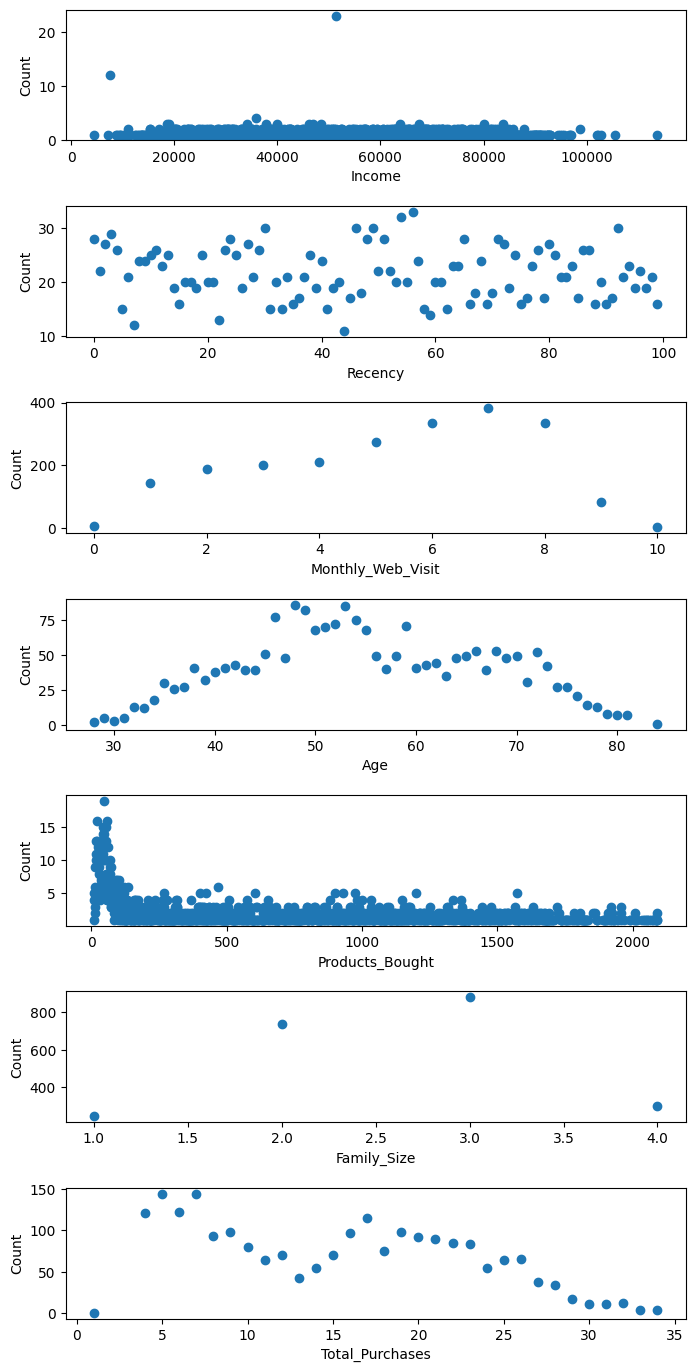

In [20]:
df = clean_df
fig, axes = plt.subplots(nrows=len(df_col), ncols=1, figsize=(8, 17))
fig.subplots_adjust(hspace=0.5, wspace=0.6)

for i, col in enumerate(df_col):
    counts = df[col].value_counts()
    axes[i].scatter(counts.index, counts.values)
    # axes[i].set_title(f'Scatter Plot for {col}')
    axes[i].set_xlabel(f'{col}')
    axes[i].set_ylabel('Count')

plt.show()

In [21]:
df['Education']

0       Graduation
1       Graduation
2       Graduation
3       Graduation
4              PhD
           ...    
2234    Graduation
2235    Graduation
2237    Graduation
2238        Master
2239           PhD
Name: Education, Length: 2157, dtype: object

In [22]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


**Data Preprocessing**

1. Mengubah 'Education' yang merupakaan data categorical menjadi numerik dengan encoding.
2. Normalisasi data

In [23]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=['Education'], return_df=True,
                            mapping=[{'col':'Education','mapping':{'Basic':0,
                                                                  'Graduation':1,
                                                                  '2n Cycle':2,
                                                                  'Master':3,
                                                                  'PhD':4,}
}])

In [24]:
df_encoded = encoder.fit_transform(df)
print(df_encoded.info())
df = df_encoded
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2157 entries, 0 to 2239
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Education          2157 non-null   int64  
 1   Income             2157 non-null   float64
 2   Recency            2157 non-null   int64  
 3   Monthly_Web_Visit  2157 non-null   int64  
 4   Age                2157 non-null   int64  
 5   Products_Bought    2157 non-null   int64  
 6   Family_Size        2157 non-null   int64  
 7   Total_Purchases    2157 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 151.7 KB
None


Education   Income  Recency  Monthly_Web_Visit  Age  Products_Bought  \
0          1  58138.0       58                  7   67             1617   
1          1  46344.0       38                  5   70               27   
2          1  71613.0       26                  4   59              776   
3          1  26646.0       26                  6   40               53   
4          4  58293.0       94                  5   43              422   

   Family_Size  Total_Purchases  
0            1               25  
1            3                6  
2            2               21  
3            3                8  
4            3               19

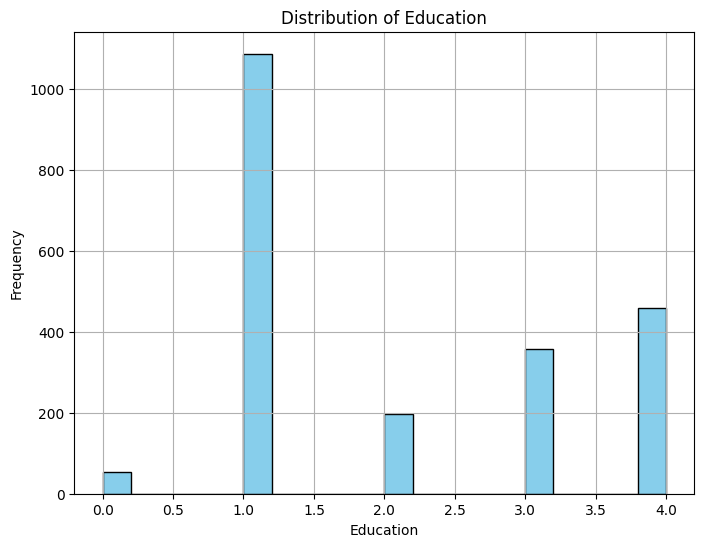

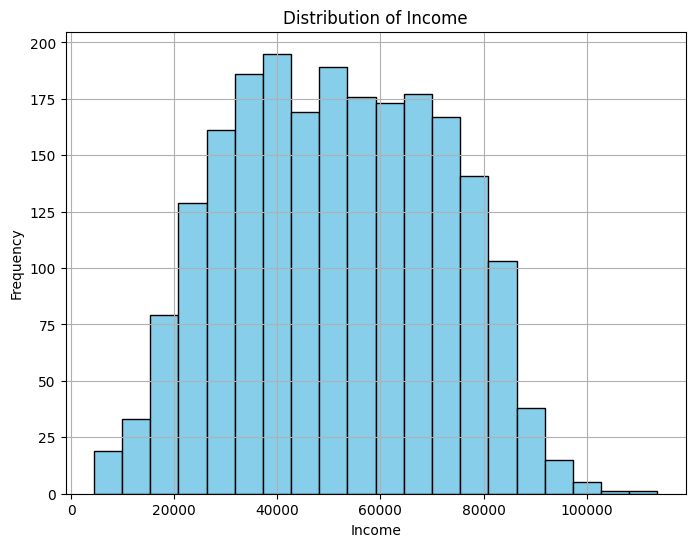

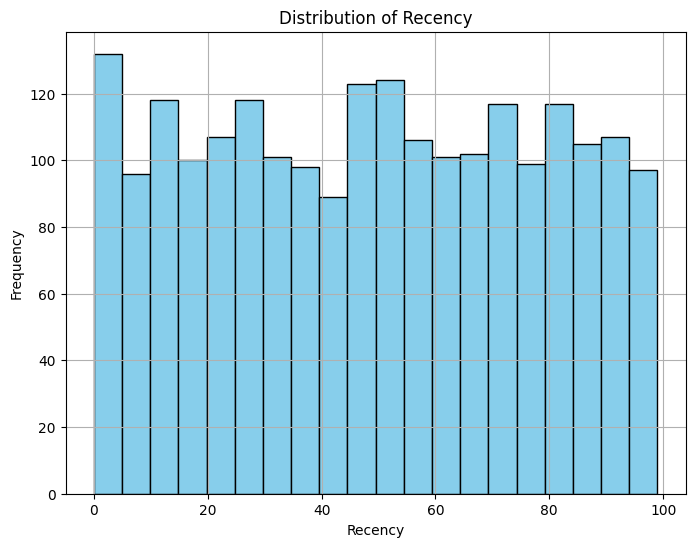

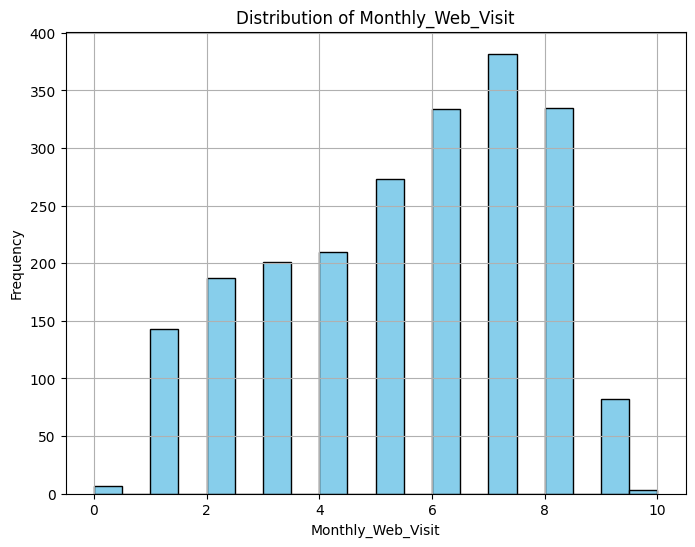

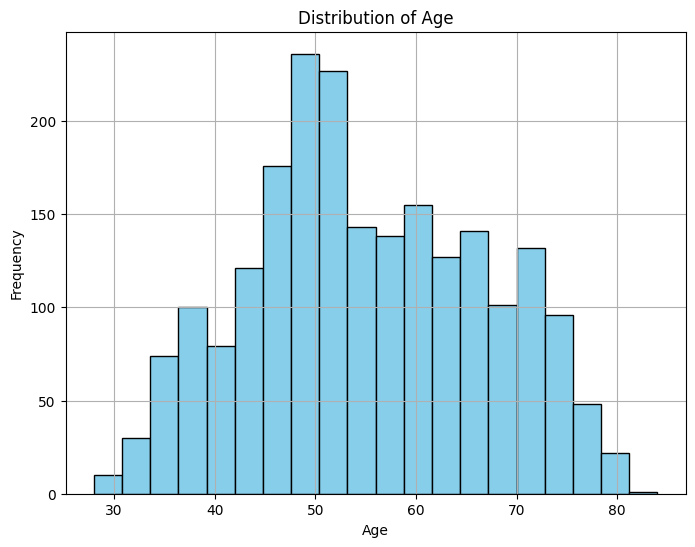

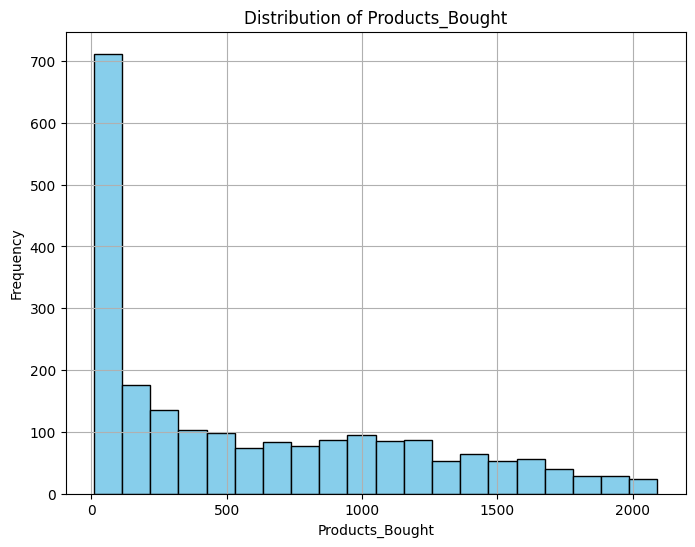

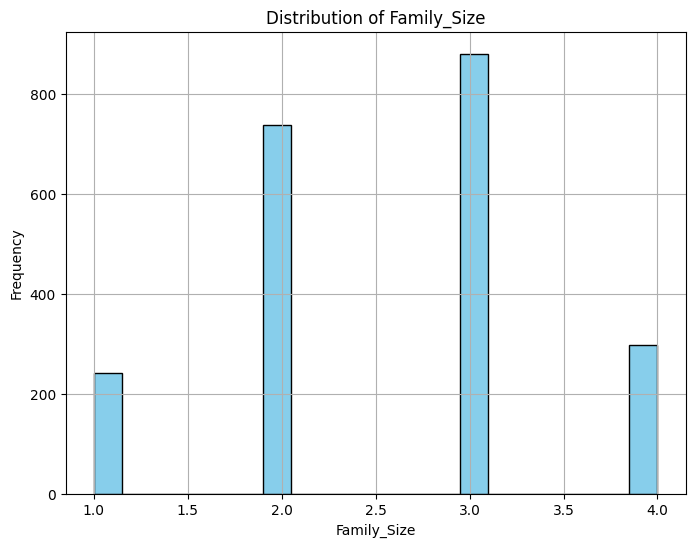

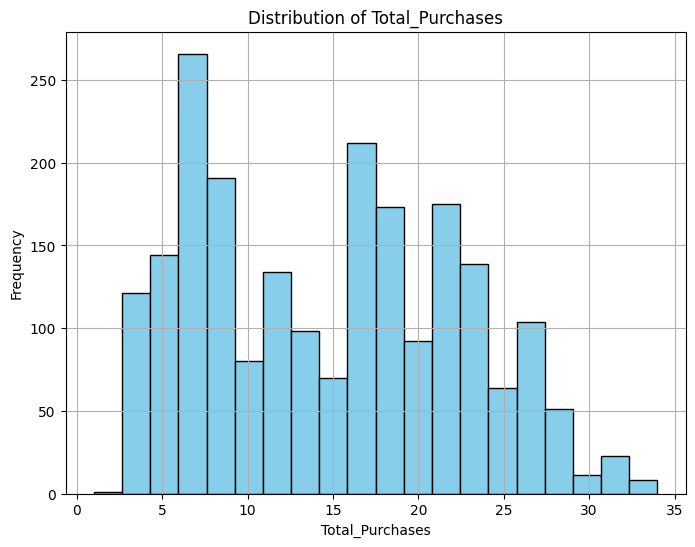

In [25]:
for column in df.columns:
        plt.figure(figsize=(8, 6))
        plt.hist(df[column], bins=20, color='skyblue', edgecolor='black')
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)
        plt.show()

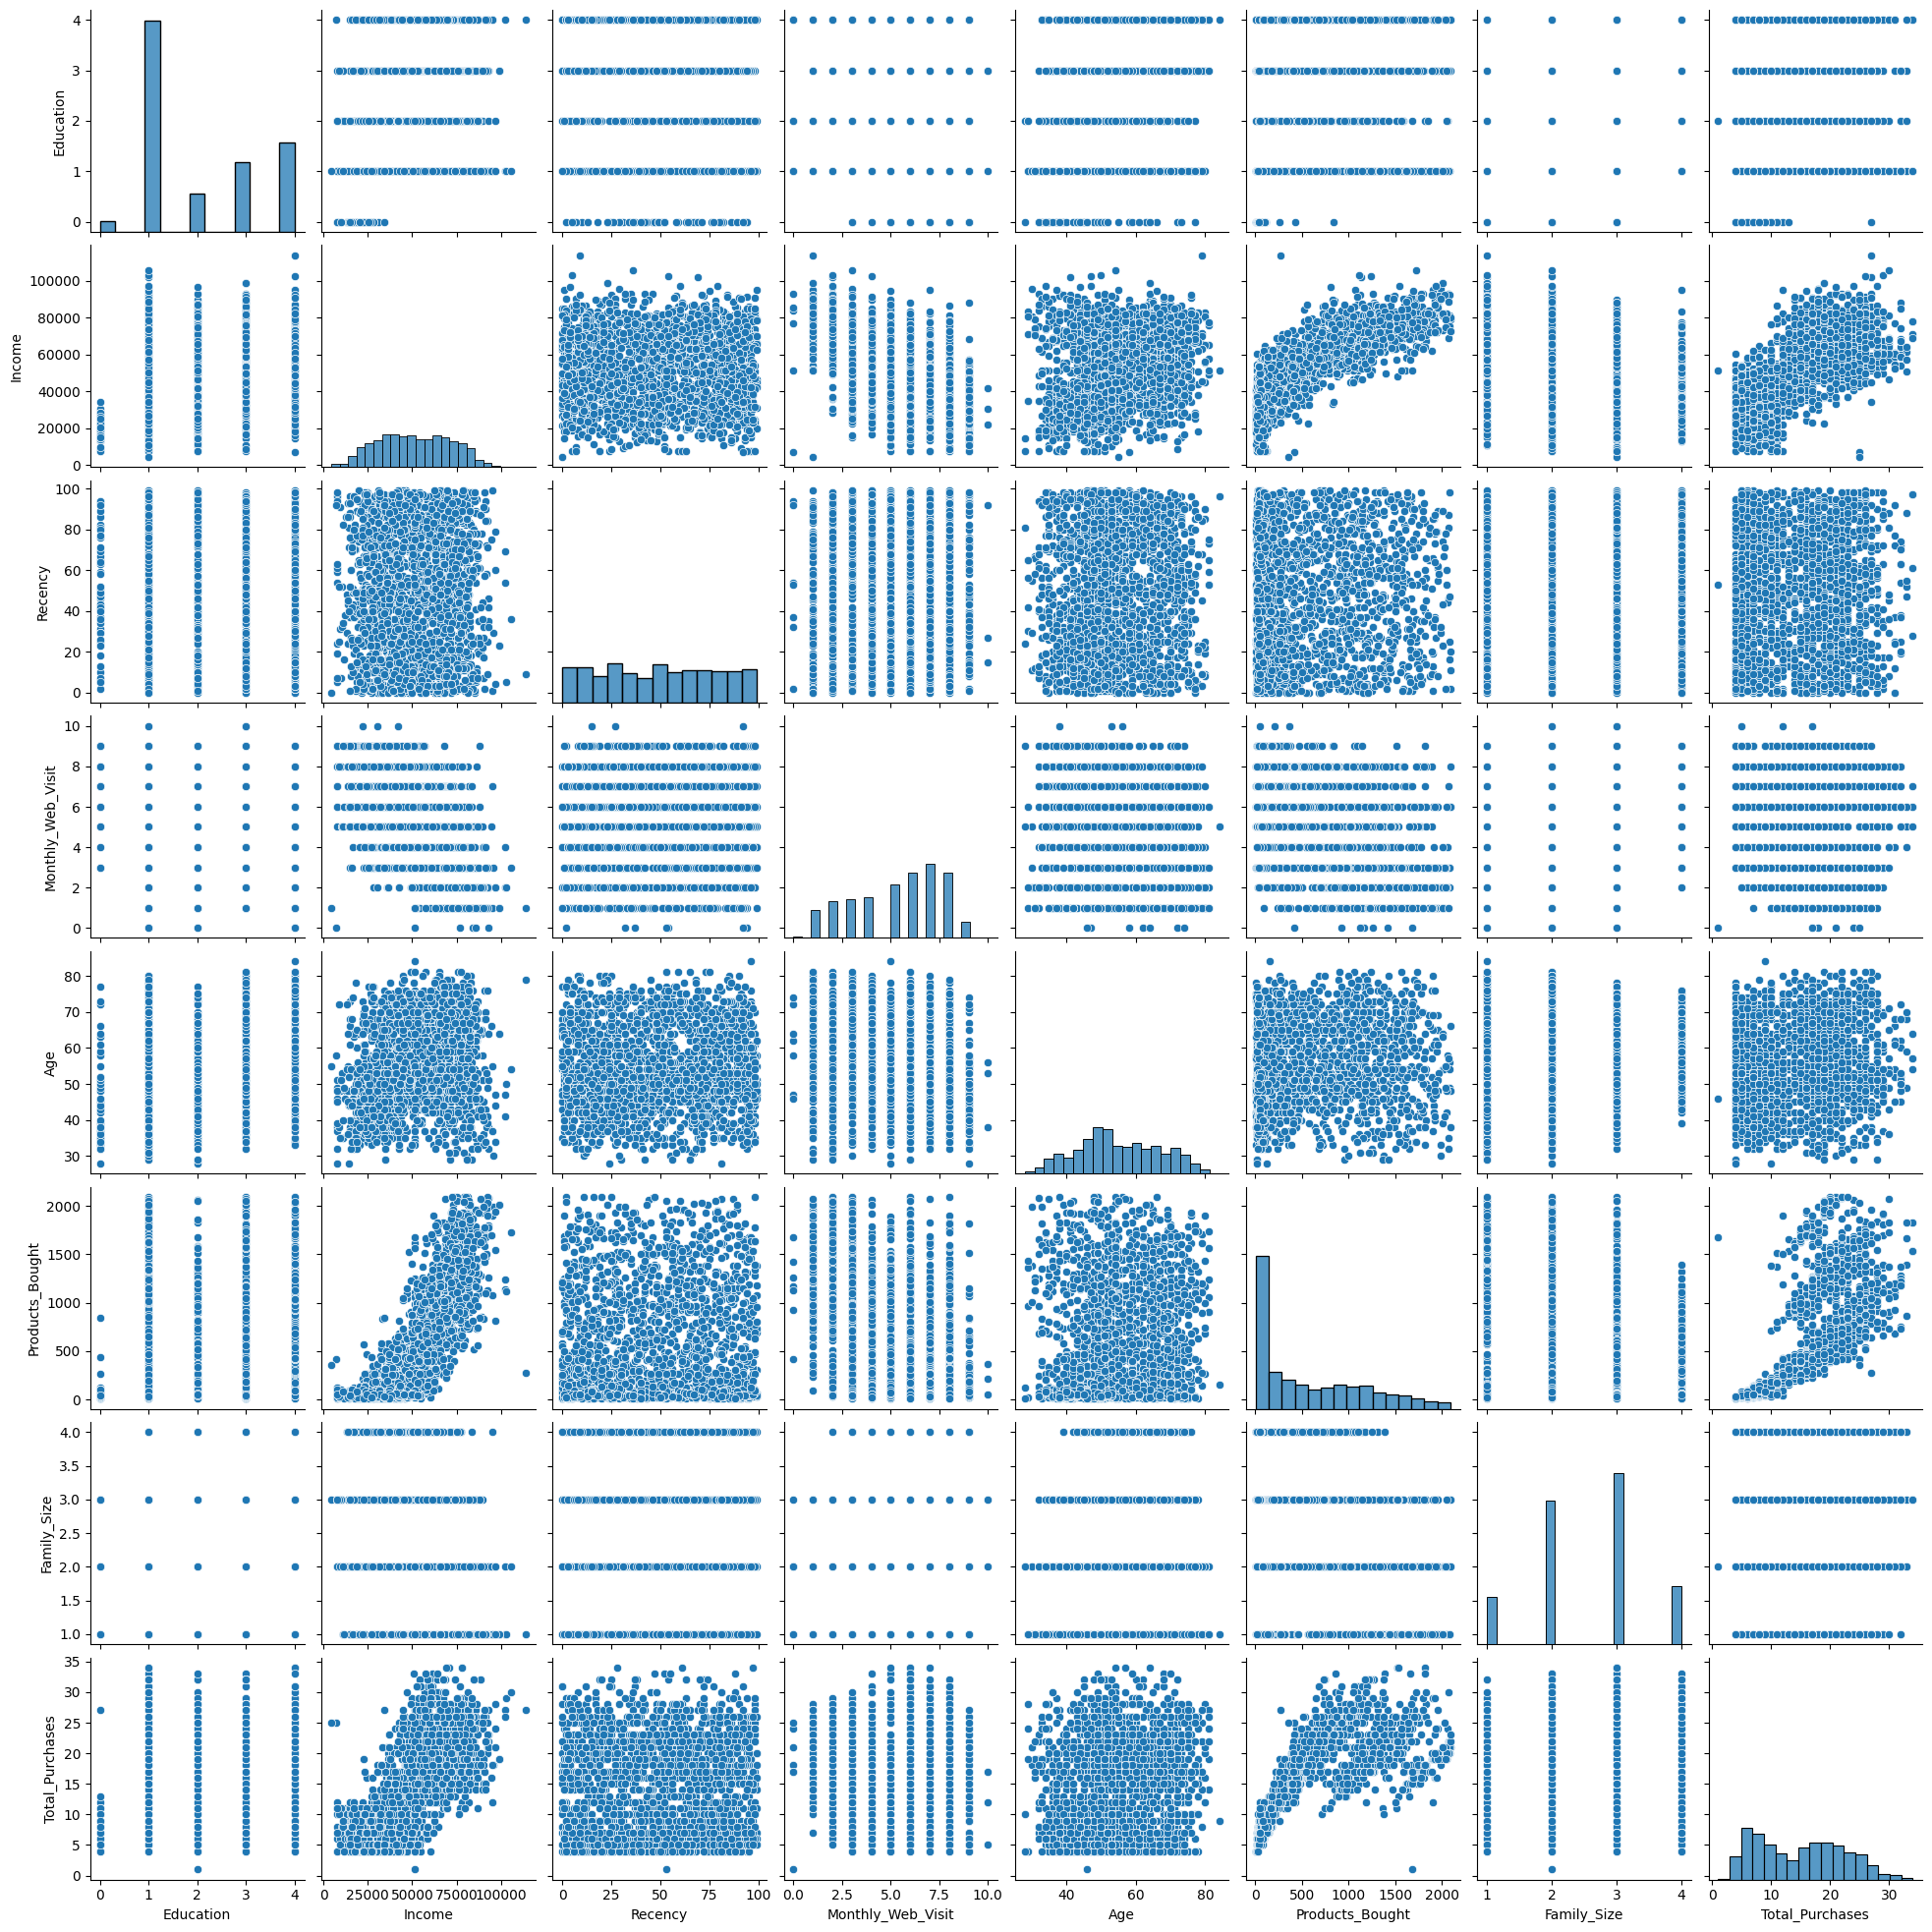

In [26]:
sns.pairplot(df, palette='tab10')
plt.show()

<Axes: >

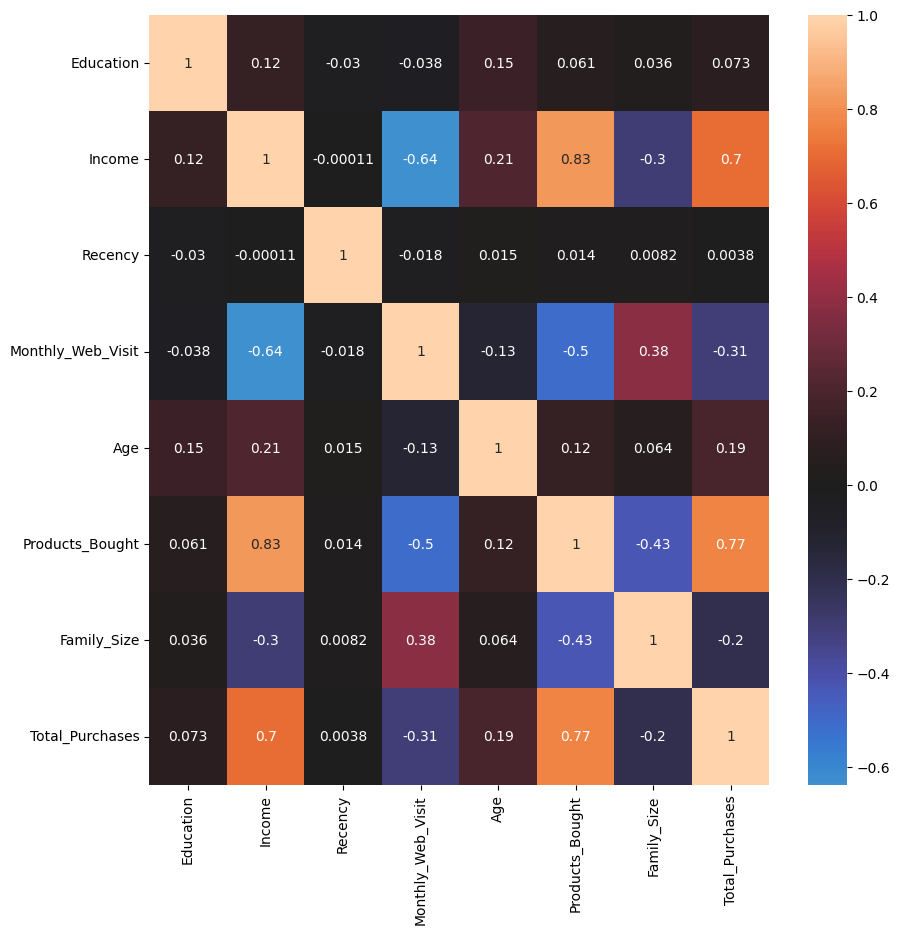

In [27]:
corrmat= df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrmat,annot=True, center=0)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns= df.columns)
scaled_df.head()

Education    Income   Recency  Monthly_Web_Visit       Age  \
0  -0.815013  0.329073  0.312057           0.741592  1.027625   
1  -0.815013 -0.253583 -0.378911          -0.135389  1.284769   
2  -0.815013  0.994775 -0.793493          -0.573880  0.341906   
3  -0.815013 -1.226718 -0.793493           0.303101 -1.286677   
4   1.540479  0.336730  1.555800          -0.135389 -1.029532   

   Products_Bought  Family_Size  Total_Purchases  
0         1.787603    -1.821281         1.347560  
1        -0.978357     0.496420        -1.168478  
2         0.324602    -0.662431         0.817867  
3        -0.933128     0.496420        -0.903632  
4        -0.291216     0.496420         0.553021

In [29]:
X = scaled_df.iloc[:,0:].values
X

array([[-0.81501261,  0.32907274,  0.312057  , ...,  1.78760314,
        -1.82128132,  1.34755957],
       [-0.81501261, -0.25358322, -0.37891149, ..., -0.97835714,
         0.49642004, -1.16847842],
       [-0.81501261,  0.9947747 , -0.79349258, ...,  0.3246015 ,
        -0.66243064,  0.81786736],
       ...,
       [-0.81501261,  0.27191376,  1.452155  , ...,  1.13351442,
        -1.82128132,  0.55302126],
       [ 0.75531539,  0.87778901, -1.41536421, ...,  0.44115455,
         0.49642004,  1.08271346],
       [ 1.5404794 ,  0.06876968, -0.30981464, ..., -0.72611548,
         1.65527072, -0.50636316]])

## Hierarchical Clustering

**Sihouette Score**

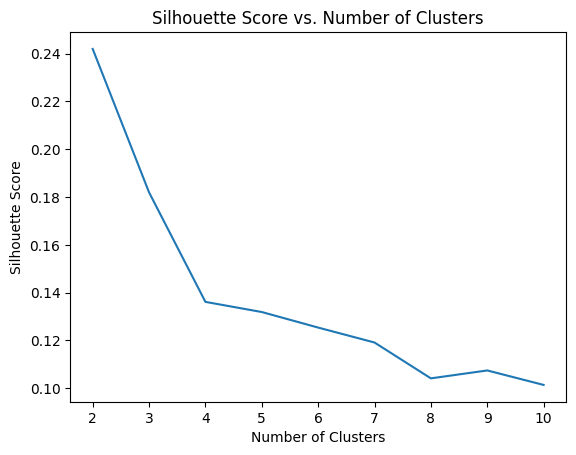

In [30]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

cluster_range = range(2, 11)
silhouette_scores = []

for n_clusters in cluster_range:
    hierarchical_clustering = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = hierarchical_clustering.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(cluster_range, silhouette_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [31]:
# Compute the pairwise distances between samples
dist_matrix = squareform(pdist(X))

# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=2)
agg_cluster.fit(scaled_df)


labels = agg_cluster.labels_
df['Cluster'] = labels
df.head()

Education   Income  Recency  Monthly_Web_Visit  Age  Products_Bought  \
0          1  58138.0       58                  7   67             1617   
1          1  46344.0       38                  5   70               27   
2          1  71613.0       26                  4   59              776   
3          1  26646.0       26                  6   40               53   
4          4  58293.0       94                  5   43              422   

   Family_Size  Total_Purchases  Cluster  
0            1               25        0  
1            3                6        1  
2            2               21        0  
3            3                8        1  
4            3               19        1

In [32]:
cluster_groups = df.groupby('Cluster')

cluster_statistics = cluster_groups.mean()

cluster_statistics

Education        Income    Recency  Monthly_Web_Visit        Age  \
Cluster                                                                     
0         2.060241  66803.196478  46.724745           4.295644  57.083411   
1         2.015770  36136.543135  51.212430           6.322820  52.936920   

         Products_Bought  Family_Size  Total_Purchases  
Cluster                                                 
0            1045.071362     2.307692        21.018536  
1             133.314471     2.835807         8.623377

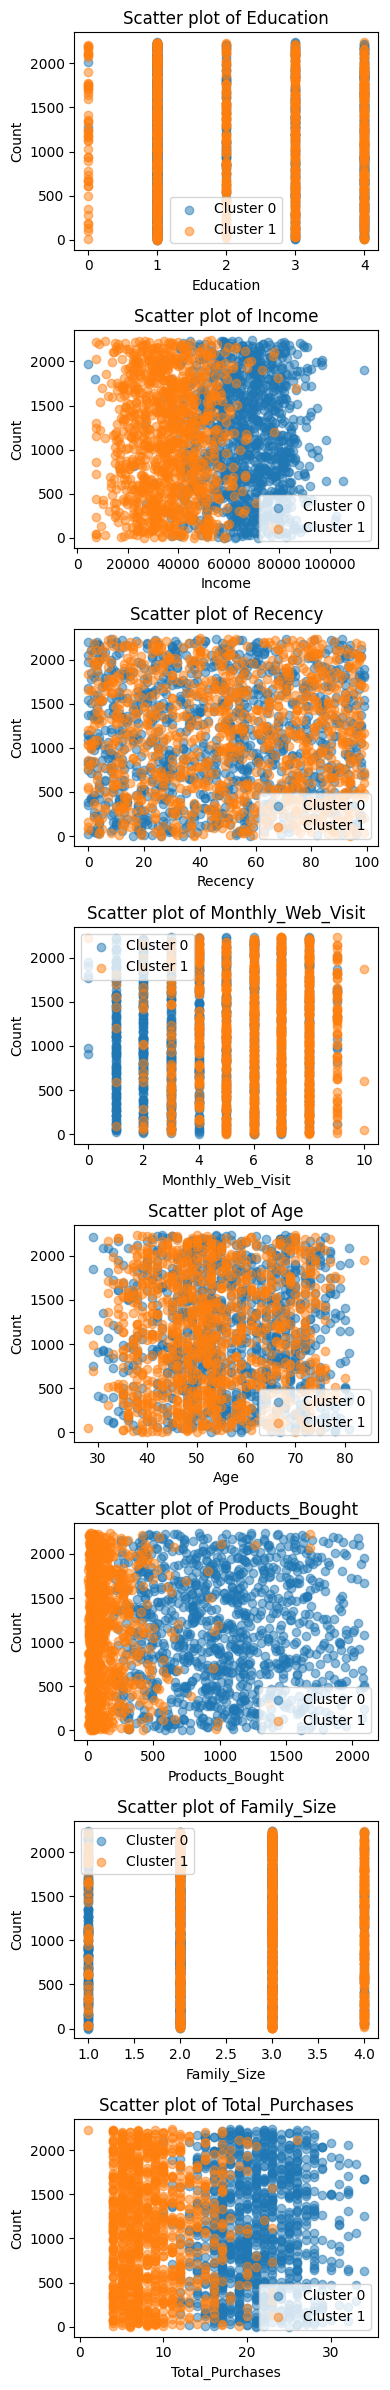

In [33]:

features = [col for col in df.columns if col != 'Cluster']

fig, axs = plt.subplots(nrows=len(features), ncols=1, figsize=(4, 3*len(features)))

for i, feature in enumerate(features):
    ax = axs[i] if len(features) > 1 else axs  # If there's only one feature, axs is not an iterable
    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        ax.scatter(cluster_data[feature], cluster_data.index, label=f'Cluster {cluster}', alpha=0.5)
    ax.set_xlabel(feature)  # You can change this to whatever makes sense for your data
    ax.set_ylabel('Count')
    ax.set_title(f'Scatter plot of {feature}')
    ax.legend()

plt.tight_layout()
plt.show()


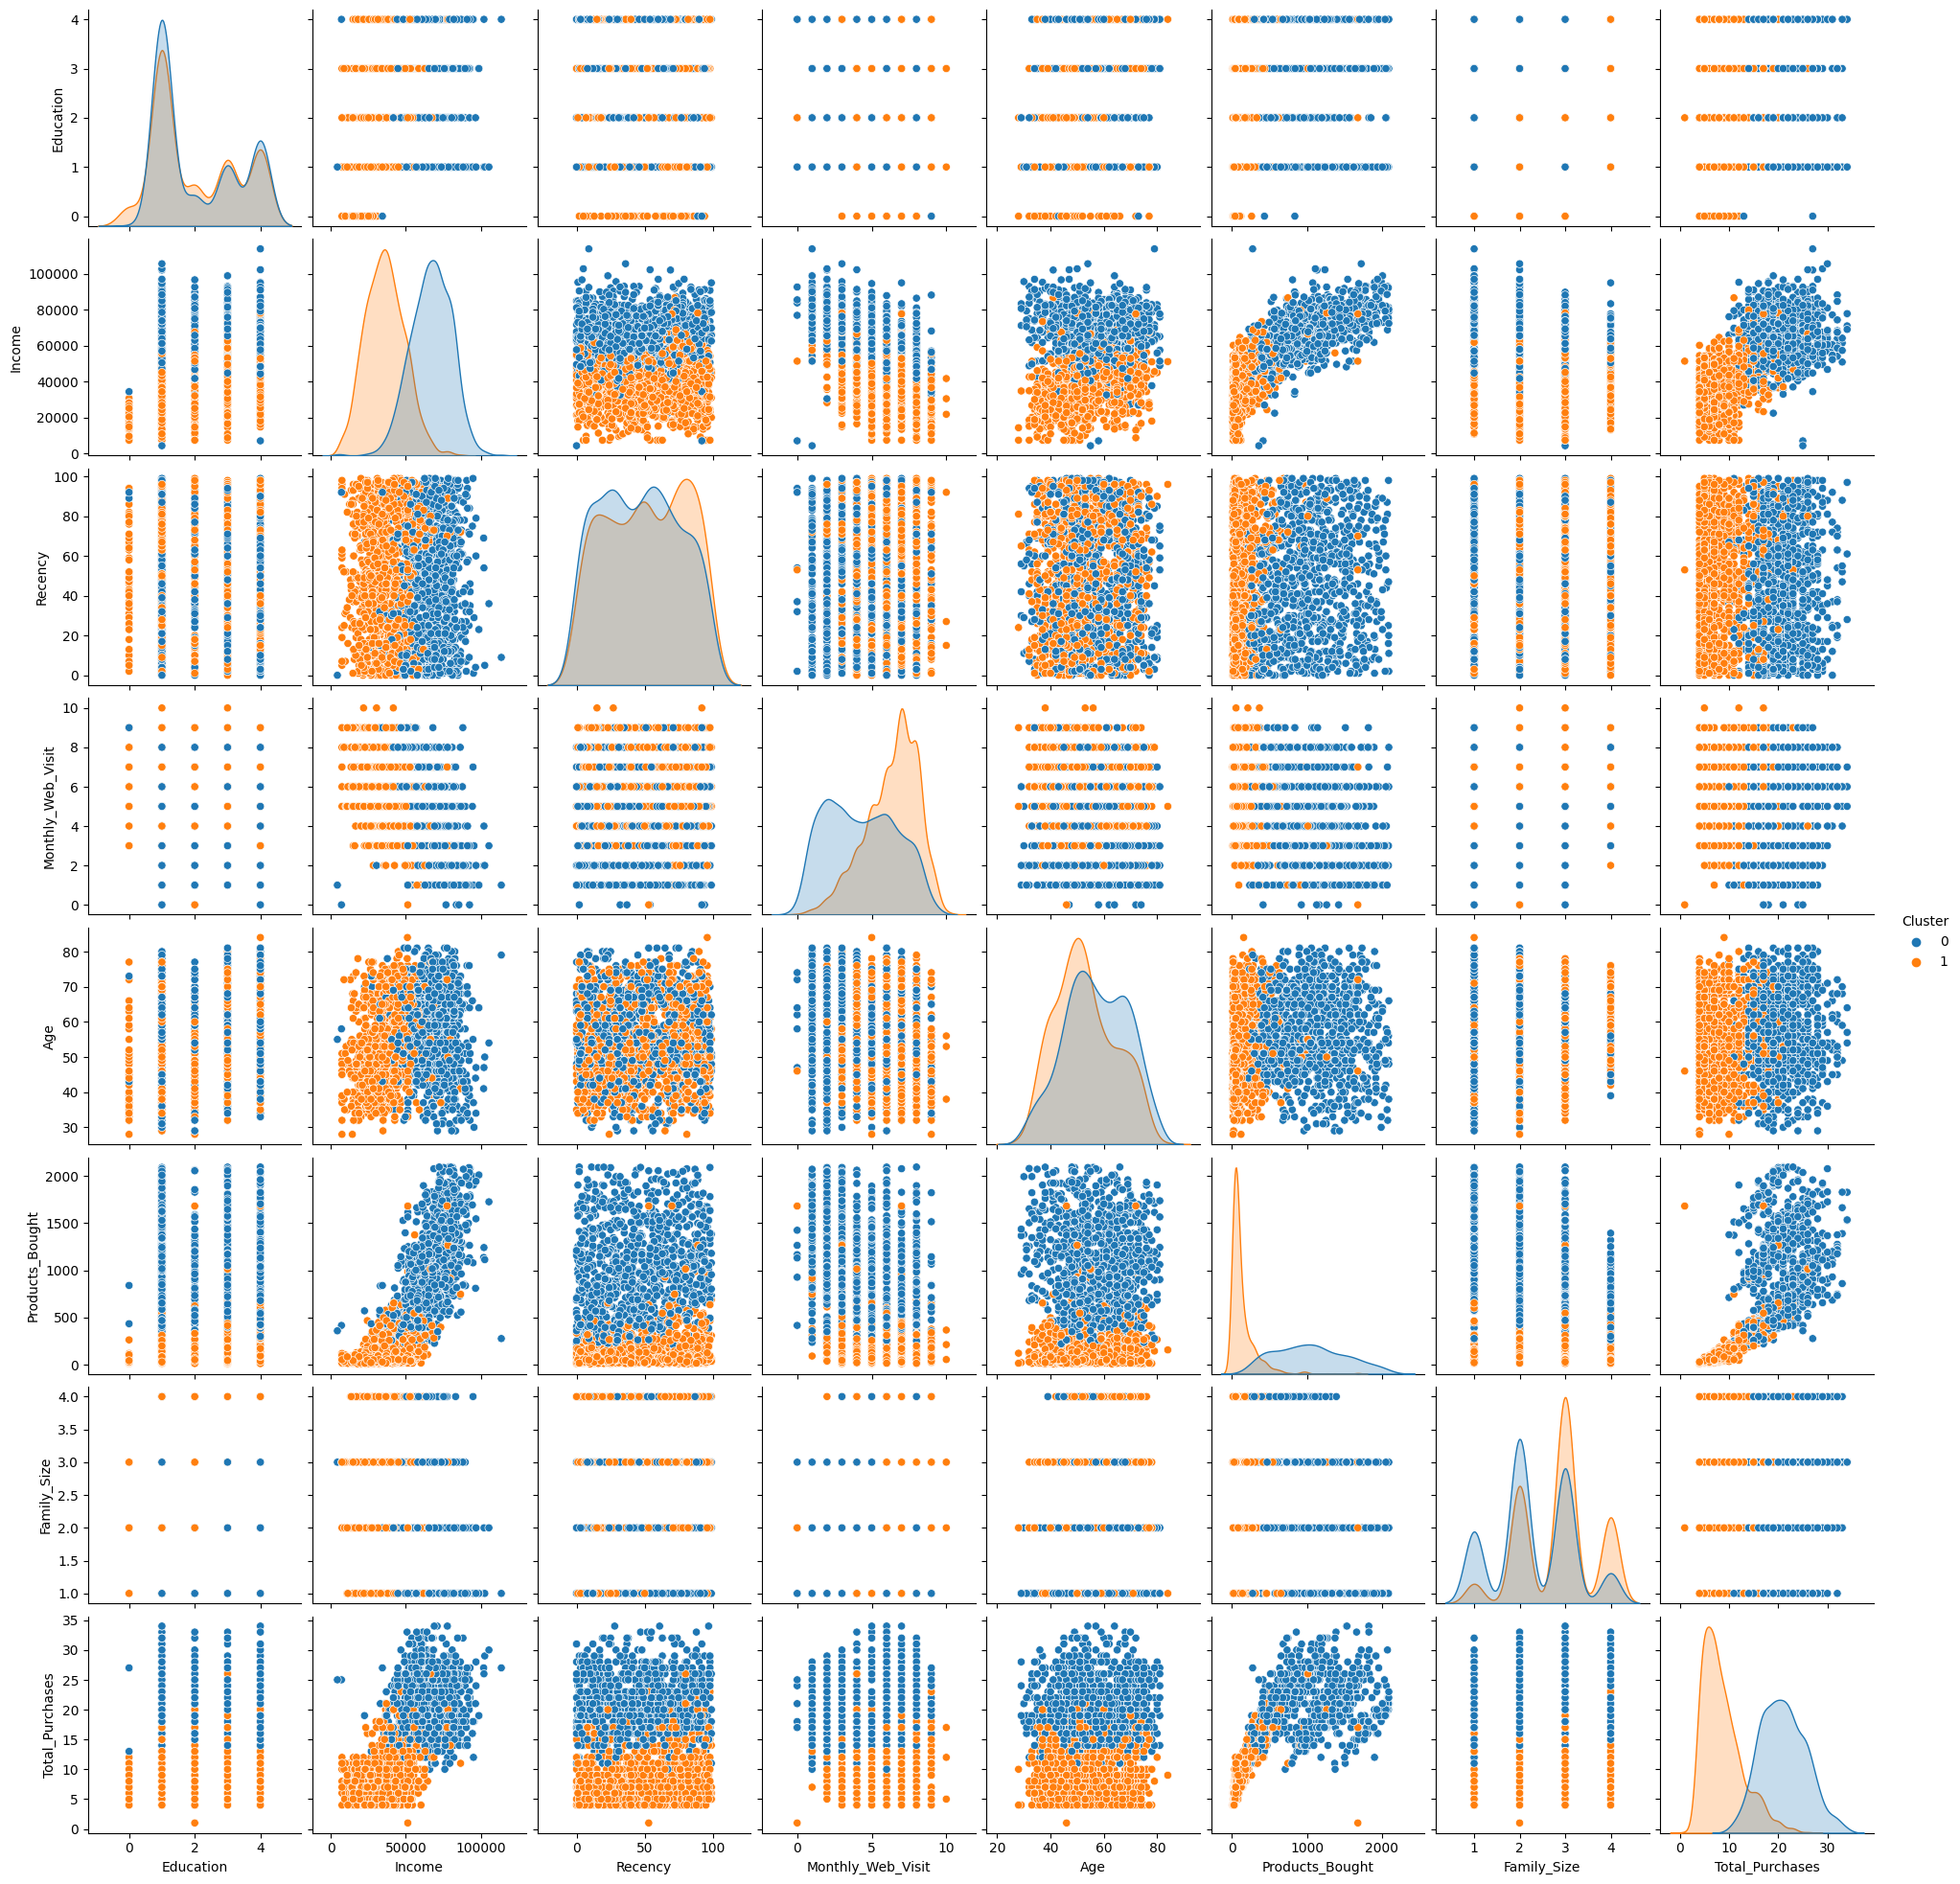

In [34]:
features.append('Cluster')
sns.pairplot(df[features], hue='Cluster', palette='tab10')
plt.show()

**Analisis:**

**Kesimpulan**

Maka dari itu dapat disimpulkan bahwa klaster pertama merupakan pelanggan yang bisa dibilang dari golongan tinggi. Pelanggan ini yang harus ditarget bisnis karena memberi keuntungan lebih banyak. Dibuktikan dengan pendapatan tinggi, jumlah pembelian banyak. Akan tetapi jumlah keluarganya sedikit seperti halnya pada beberapa negara maju seperti Jepang.

Sedangkan klaster kedua merupakan pelanggan yang bisa dibilang dari golongan rendah, yang mana hal ini masuk akal, karena pendapatan rendah, lebih jarang membeli barang, lalu seperti pada negara berkembang pada umumnya, jumlah keluarganya lebih banyak. 

### Dendrogram

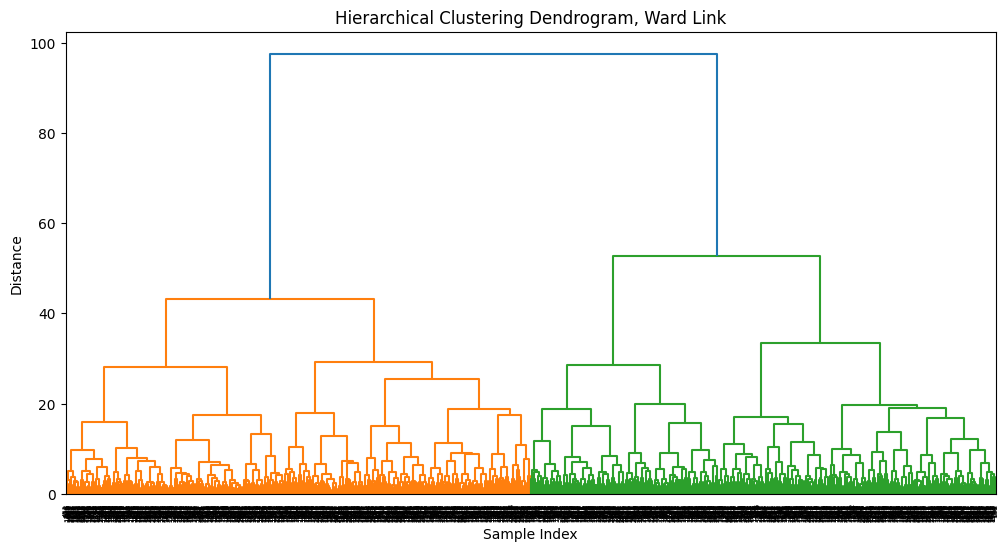

In [35]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Compute the linkage matrix
Z = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Ward Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

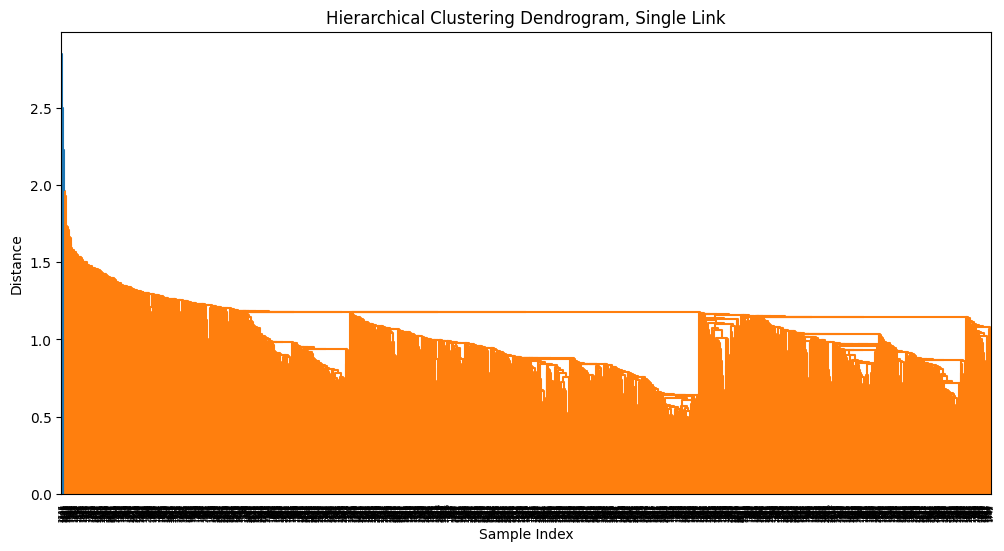

In [36]:
# Compute the linkage matrix
Z = linkage(X, method='single')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Single Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

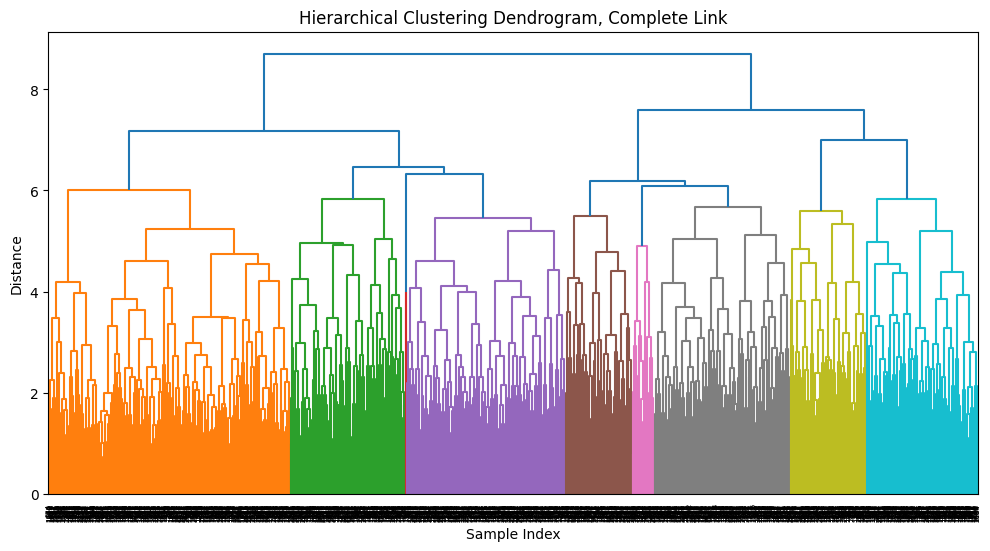

In [37]:
# Compute the linkage matrix
Z = linkage(X, method='complete')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Complete Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

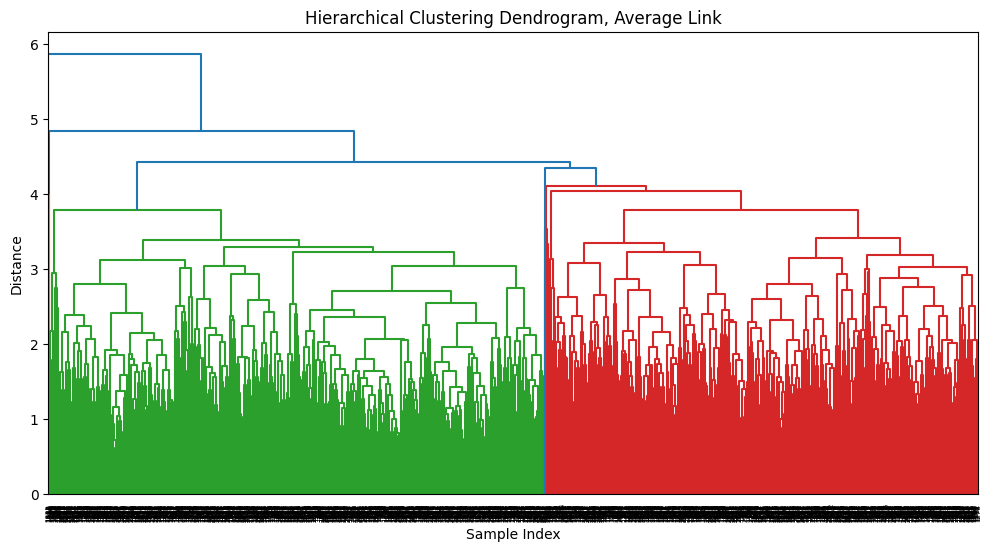

In [38]:
# Compute the linkage matrix
Z = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram, Average Link')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

Dapat dilihat bahwa metode terbaik adalah ward linkage

### Hierarchical dengan Feature Selection

Kali ini akan digunakan teknik feature selection dengan algoritma greedy untuk memilih fitur mana yang akan digunakan dalam hierachical


In [53]:
scaled_df

Education    Income   Recency  Monthly_Web_Visit       Age  \
0     -0.815013  0.329073  0.312057           0.741592  1.027625   
1     -0.815013 -0.253583 -0.378911          -0.135389  1.284769   
2     -0.815013  0.994775 -0.793493          -0.573880  0.341906   
3     -0.815013 -1.226718 -0.793493           0.303101 -1.286677   
4      1.540479  0.336730  1.555800          -0.135389 -1.029532   
...         ...       ...       ...                ...       ...   
2152  -0.815013 -0.842612  1.106671           0.741592 -0.429528   
2153  -0.815013  0.481480 -0.102524          -0.135389  0.170476   
2154  -0.815013  0.271914  1.452155           0.303101 -1.029532   
2155   0.755315  0.877789 -1.415364          -1.012371  1.113339   
2156   1.540479  0.068770 -0.309815           0.741592  1.284769   

      Products_Bought  Family_Size  Total_Purchases  
0            1.787603    -1.821281         1.347560  
1           -0.978357     0.496420        -1.168478  
2            0.324602    -0.662431         0.817867  
3           -0.933128     0.496420        -0.903632  
4           -0.291216     0.496420         0.553021  
...               ...          ...              ...  
2152        -0.973138     0.496420        -1.433325  
2153         1.307474     0.496420         0.420598  
2154         1.133514    -1.821281         0.553021  
2155         0.441155     0.496420         1.082713  
2156        -0.726115     1.655271        -0.506363  

[2157 rows x 8 columns]

for k=2, the best silhoutte score is 0.31334328750125295
And the best features are ['Education', 'Family_Size', 'Products_Bought']
for k=3, the best silhoutte score is 0.29271697443931294
And the best features are ['Family_Size', 'Education', 'Income']
for k=4, the best silhoutte score is 0.3208271768496281
And the best features are ['Family_Size', 'Education', 'Income']
for k=5, the best silhoutte score is 0.3475123009459712
And the best features are ['Education', 'Family_Size', 'Products_Bought']
for k=6, the best silhoutte score is 0.34117478531446077
And the best features are ['Monthly_Web_Visit', 'Family_Size', 'Products_Bought']
for k=7, the best silhoutte score is 0.3373776284765293
And the best features are ['Monthly_Web_Visit', 'Family_Size', 'Products_Bought']


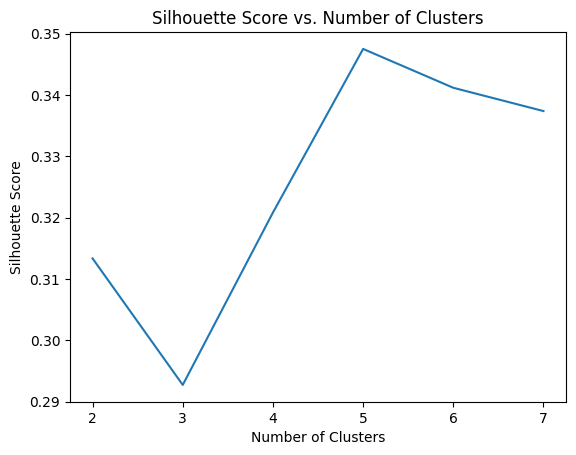

In [64]:
kmin = 2
kmax = 7
maxvars = 3
silhouette_scores_dict = {}
best_scores = []
K = range(2,8)
# Iterate over each cluster number (k)
for k in range(kmin, kmax+1):
    selected_variables = []
    while len(selected_variables) < maxvars:
        results = []
        for feature in scaled_df.columns:
            if feature not in selected_variables:
                temp_selected = selected_variables + [feature]
                # Perform agglomerative clustering
                agg_cluster = AgglomerativeClustering(n_clusters=k)
                cluster_labels = agg_cluster.fit_predict(scaled_df[temp_selected])
                # Compute silhouette score
                silhouette_avg = silhouette_score(scaled_df[temp_selected], cluster_labels)
                results.append((feature, silhouette_avg))
        # Select the variable with the highest silhouette score
        best_feature, best_score = max(results, key=lambda x: x[1])
        selected_variables.append(best_feature)
        
        # Store silhouette score for this combination of features and cluster number
    best_scores.append(best_score)
    print(f"for k={k}, the best silhoutte score is {best_score}")
    print(f"And the best features are {selected_variables}")
plt.plot(K, best_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

Dapat dilihat dari hasilnya, fitur yang akan kita ambil yaitu 'Education', 'Family_Size', 'Products_Bought' dengan k=5

In [68]:
cols = list(df.columns.values)
cols.pop(cols.index('Education'))
df = df[cols+['Education']]

cols = list(df.columns.values)
cols.pop(cols.index('Family_Size'))
df = df[cols+['Family_Size']]

cols = list(df.columns.values)
cols.pop(cols.index('Products_Bought'))
df = df[cols+['Products_Bought']]

df = df.drop('Cluster', axis=1)
df.head()

Income  Recency  Age  Total_Purchases  Monthly_Web_Visit  Education  \
0  58138.0       58   67               25                  7          1   
1  46344.0       38   70                6                  5          1   
2  71613.0       26   59               21                  4          1   
3  26646.0       26   40                8                  6          1   
4  58293.0       94   43               19                  5          4   

   Family_Size  Products_Bought  
0            1             1617  
1            3               27  
2            2              776  
3            3               53  
4            3              422

In [69]:
X = df.iloc[:,5:8].values
X

array([[   1,    1, 1617],
       [   1,    3,   27],
       [   1,    2,  776],
       ...,
       [   1,    1, 1241],
       [   3,    3,  843],
       [   4,    4,  172]])

In [70]:
data = StandardScaler().fit_transform(X)
data

array([[-0.81501261, -1.82128132,  1.78760314],
       [-0.81501261,  0.49642004, -0.97835714],
       [-0.81501261, -0.66243064,  0.3246015 ],
       ...,
       [-0.81501261, -1.82128132,  1.13351442],
       [ 0.75531539,  0.49642004,  0.44115455],
       [ 1.5404794 ,  1.65527072, -0.72611548]])

In [74]:
# Fit the Agglomerative Clustering model
agg_cluster = AgglomerativeClustering(n_clusters=5)
agg_cluster.fit(data)


labels = agg_cluster.labels_
df['Cluster'] = labels
df.head()

Income  Recency  Age  Total_Purchases  Monthly_Web_Visit  Education  \
0  58138.0       58   67               25                  7          1   
1  46344.0       38   70                6                  5          1   
2  71613.0       26   59               21                  4          1   
3  26646.0       26   40                8                  6          1   
4  58293.0       94   43               19                  5          4   

   Family_Size  Products_Bought  Cluster  
0            1             1617        4  
1            3               27        3  
2            2              776        4  
3            3               53        3  
4            3              422        2

In [83]:
df.describe()

Income      Recency          Age  Total_Purchases  \
count    2157.000000  2157.000000  2157.000000      2157.000000   
mean    51476.978442    48.967548    55.011127        14.823829   
std     20246.484720    28.951592    11.669294         7.553306   
min      4428.000000     0.000000    28.000000         1.000000   
25%     35441.000000    24.000000    46.000000         8.000000   
50%     51381.500000    49.000000    54.000000        15.000000   
75%     67506.000000    74.000000    65.000000        21.000000   
max    113734.000000    99.000000    84.000000        34.000000   

       Monthly_Web_Visit    Education  Family_Size  Products_Bought  \
count        2157.000000  2157.000000  2157.000000      2157.000000   
mean            5.308762     2.038016     2.571627       589.404265   
std             2.281079     1.273915     0.863124       574.978863   
min             0.000000     0.000000     1.000000         9.000000   
25%             4.000000     1.000000     2.000000        69.000000   
50%             6.000000     1.000000     3.000000       395.000000   
75%             7.000000     3.000000     3.000000      1027.000000   
max            10.000000     4.000000     4.000000      2092.000000   

           Cluster  
count  2157.000000  
mean      2.044043  
std       1.397854  
min       0.000000  
25%       1.000000  
50%       2.000000  
75%       3.000000  
max       4.000000

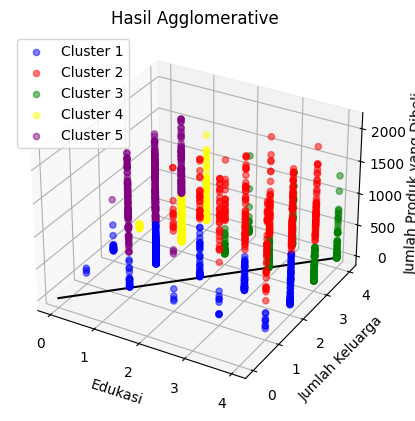

In [84]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]

agg_plot = plt.axes(projection='3d')
xline = np.linspace(0, 4, 1000)
yline = np.linspace(0, 4, 1000)
zline = np.linspace(0, 15, 1000)
agg_plot.plot3D(xline, yline, zline, 'black')

agg_plot.scatter3D(df1.Education,  df1.Family_Size, df1.Products_Bought,
                       c='blue', label='Cluster 1', alpha=0.5)
agg_plot.scatter3D(df2.Education,  df2.Family_Size, df2.Products_Bought,
                       c='red', label='Cluster 2', alpha=0.5)
agg_plot.scatter3D(df3.Education,  df3.Family_Size, df3.Products_Bought,
                       c='green', label='Cluster 3', alpha=0.5)
agg_plot.scatter3D(df4.Education,  df4.Family_Size, df4.Products_Bought,
                       c='yellow', label='Cluster 4', alpha=0.5)
agg_plot.scatter3D(df5.Education,  df5.Family_Size, df5.Products_Bought,
                       c='purple', label='Cluster 5', alpha=0.5)

plt.legend()
agg_plot.set_xlabel('Edukasi')
agg_plot.set_ylabel('Jumlah Keluarga')
agg_plot.set_zlabel('Jumlah Produk yang Dibeli')
plt.title("Hasil Agglomerative")
plt.show()

In [85]:
cluster_groups = df.groupby('Cluster')

cluster_statistics = cluster_groups.mean()

cluster_statistics

Income    Recency        Age  Total_Purchases  \
Cluster                                                        
0        37451.181710  47.513064  52.394299        10.273159   
1        69791.305990  48.598958  58.026042        21.718750   
2        42211.482022  47.950562  55.743820        10.705618   
3        40442.061866  49.914807  53.578093        11.456389   
4        71852.626812  50.753623  55.794686        21.492754   

         Monthly_Web_Visit  Education  Family_Size  Products_Bought  
Cluster                                                              
0                 6.059382   1.857482     1.883610       205.285036  
1                 4.020833   3.312500     2.101562      1235.645833  
2                 6.143820   3.269663     3.337079       191.222472  
3                 6.340771   0.955375     3.298174       225.091278  
4                 3.613527   1.004831     2.019324      1242.434783

#### **Analisis dan Kesimpulan**

Cluster 1:
Pelanggan pada klaster ini memiliki tingkat pendidikan pada rata-rata. Jumlah anggota keluarga mereka sedikit. Mereka juga sedikit melakukan pembelian. 
Klaster ini berkemungkinan besar merupakan para orang dewasa relatif muda yang masih belum menikah atau belum memiliki anak dan masih memiliki pekerjaan yang berbayar sedikit.

Cluster 2:
Pelanggan pada klaster ini memiliki tingkat pendidikan yang tinggi. Jumlah anggota keluarga mereka sedikit dibawah rata-rata. Mereka sering melakukan pembelian.
Klaster ini berkemungkinan besar merupakan para orang yang sudah lansia yang enggan memiliki anak. Pendapatan mereka tinggi. Mereka juga jarang mengunjungi website.

Cluster 3:
Pelanggan pada klaster ini memiliki tingkat pendidikan yang tinggi. Jumlah anggota keluarga mereka tinggi. Akan tetapi mereka jarang melakukan pembelian.
Klaster ini berkemungkinan besar merupakan orang tua beredukasi tinggi pada umumnya yang memilii 1 hingga 3 anak. Memiliki pendapatan rata-rata.

Cluster 4:
Pelanggan pada klaster ini memiliki tingkat pendidikan yang rendah. Jumlah anggota keluarga mereka banyak. Mereka jarang melakuakan pembelian.
Klaster ini berkemungkinan besar merupakan orang golongan rendah yang masih memeiliki pendapatan lumayan.

Cluster 5:
Pelanggan pada klaster ini memiliki tingkat pendidikan yang rendah. Jumlah anggota keluarga mereka relatif sedikit. Mereka banyak membeli barang.
Klaster ini berkemungkinan besar merupakan orang dewasa yang memiliki usaha sendiri. Mereka juga enggan memiliki anak.